<a href="https://colab.research.google.com/github/max1nehour/Boosting-ML-in-AMR-Prediction/blob/main/FS_CATB(e_faecium).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 6.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import Pool, CatBoostClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
#/content/drive/MyDrive/wulab_final

Mounted at /content/drive


In [ ]:
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)
pd.set_option('display.max_colwidth',10)

# 函式

In [ ]:
def print_feature(model):
  features= []
  plt.figure(figsize=(10,6))
  plt.rcParams["figure.figsize"] = (10,20)
  plot_importance(model,max_num_features=100)
  for i in model.feature_importances_:
    if i > 0:
      features.append(i)
  print('特徵重要程度數量: ',len(features))

# 建立測試集的 DataFrme
def toDF (model,X_test,y_test):
  df_test=pd.DataFrame(X_test)
  df_test['Resistant'] = y_test
  pred = model.predict(X_test)
  df_test['Predict'] = pred
  #print(df_test)
  return pred

def line_plot(y_test,pred, drug):
  x = np.arange(len(y_test))

  plt.figure(figsize=(10, 6))
  # Plot true labels and predicted labels
  plt.plot(x, y_test, 'bo-', label='True Label')
  plt.plot(x, pred, 'cx-', label='Predicted Label')

# Add labels and title
  plt.xlabel('Sample Index')
  plt.ylabel('Label')
  plt.title('True vs Predicted Labels ({})'.format(drug))
  plt.legend()  # Show legend
  plt.show()

def heatmap(y_test,pred,drug):
  # Combine true labels and predicted labels into a matrix
  matrix = np.array([y_test, pred])
  plt.figure(figsize=(10, 6))
  # Create a heatmap using Seaborn
  sns.heatmap(matrix, cmap='Blues', annot=True, fmt='d', xticklabels=['True Label', 'Predicted Label'])
  plt.xlabel('Index')
  plt.ylabel('Label')
  plt.title('True vs Predicted Labels - Heatmap({})'.format(drug))
  plt.show()

def keytrans(key,x):
  newkey = (int(i[1:]) for i in key)
  #print("newkey", newkey)
  f_names= []
  for i in newkey:
    f_names.append(x[i])
    #print("f_names", f_names)

  return f_names


In [ ]:

def print_feature(model):
  features = model.feature_importances_
  # Get column names and convert to list
  genes = df_data.columns.tolist()
  gene_list = genes[1:]

  # Filter out features with very small importances
  threshold = 0.1  # Set a threshold to filter out unimportant features
  indices = np.where(features > threshold)[0]
  filtered_importances = features[indices]
  filtered_feature_names = np.array(gene_list)[indices]

  # Sort by importance
  sorted_idx = np.argsort(filtered_importances)[::-1]
  filtered_importances = filtered_importances[sorted_idx]
  filtered_feature_names = filtered_feature_names[sorted_idx]

  keys_df_data = pd.DataFrame({'Gene': filtered_feature_names,'Score': filtered_importances}).sort_values(by = "Score", ascending=False)
  keys_df_data.to_csv('/content/drive/My Drive/wulab_final/cat_{}_keys.csv'.format(i))
  data = pd.DataFrame(data=filtered_importances, index=filtered_feature_names, columns=["score"]).sort_values(by = "score", ascending=False)
  data.nlargest(100, columns="score").plot(kind='barh', figsize = (10,6), fontsize=8) ## plot top 40 features
  plt.show()

  # Plot the histogram
  plt.yticks(fontsize=6)
  plt.figure(figsize=(10, 12))
  plt.barh(filtered_feature_names, filtered_importances, color='skyblue')
  plt.xlabel('Importance')
  plt.ylabel('Feature')
  plt.title('Feature Importances')
  plt.show()


## 1) 載入資料集

---------------ampicillin-----------------
0:	learn: 0.4633837	total: 210ms	remaining: 1m 2s
100:	learn: 0.0040158	total: 33.4s	remaining: 1m 5s
200:	learn: 0.0020865	total: 1m 2s	remaining: 30.8s
299:	learn: 0.0014365	total: 1m 31s	remaining: 0us


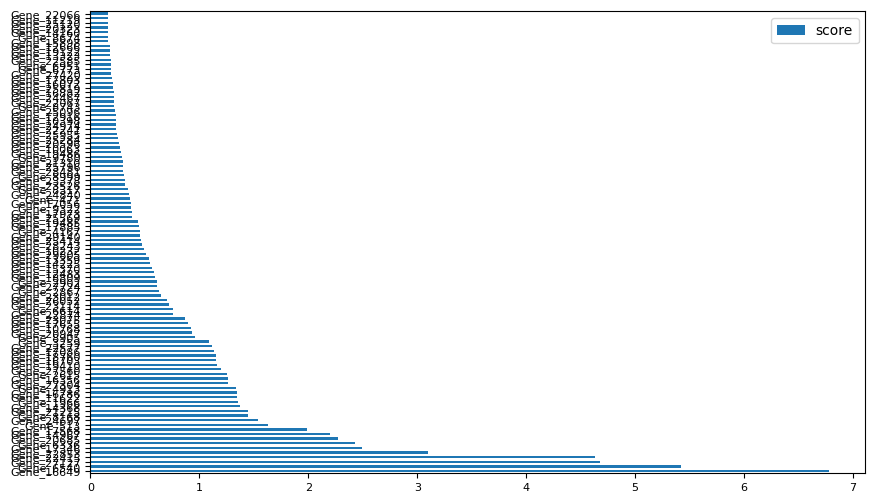

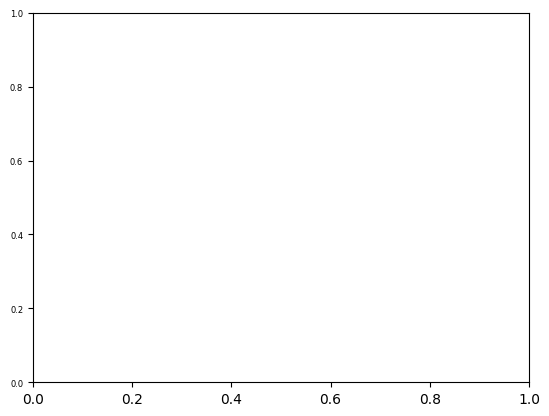

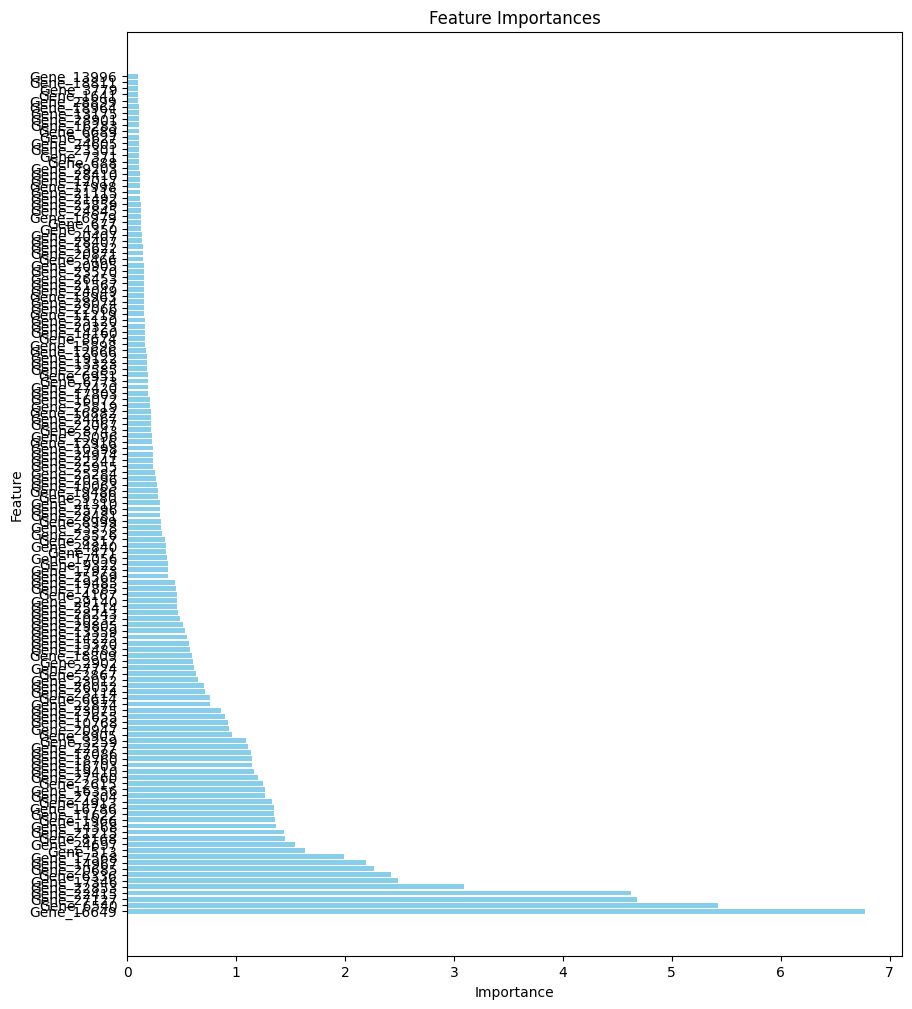

Streaming output truncated to the last 5000 lines.
25:	learn: 0.4692857	total: 17.7ms	remaining: 662ms
26:	learn: 0.4633462	total: 18.3ms	remaining: 659ms
27:	learn: 0.4572858	total: 18.7ms	remaining: 650ms
28:	learn: 0.4496627	total: 19.3ms	remaining: 646ms
29:	learn: 0.4437982	total: 19.9ms	remaining: 644ms
30:	learn: 0.4364022	total: 20.3ms	remaining: 634ms
31:	learn: 0.4291305	total: 20.9ms	remaining: 631ms
32:	learn: 0.4219809	total: 21.4ms	remaining: 628ms
33:	learn: 0.4163333	total: 22ms	remaining: 625ms
34:	learn: 0.4107769	total: 22.5ms	remaining: 621ms
35:	learn: 0.4050231	total: 23ms	remaining: 617ms
36:	learn: 0.3996668	total: 23.6ms	remaining: 613ms
37:	learn: 0.3940201	total: 24.1ms	remaining: 610ms
38:	learn: 0.3875445	total: 24.7ms	remaining: 608ms
39:	learn: 0.3823782	total: 25.3ms	remaining: 606ms
40:	learn: 0.3769987	total: 25.8ms	remaining: 604ms
41:	learn: 0.3717065	total: 26.4ms	remaining: 602ms
42:	learn: 0.3656225	total: 26.9ms	remaining: 599ms
43:	learn: 0.3605

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


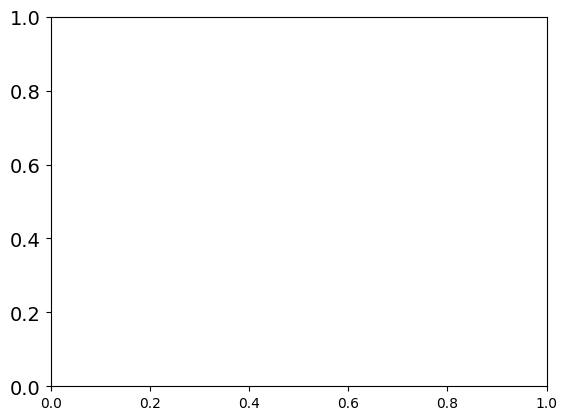

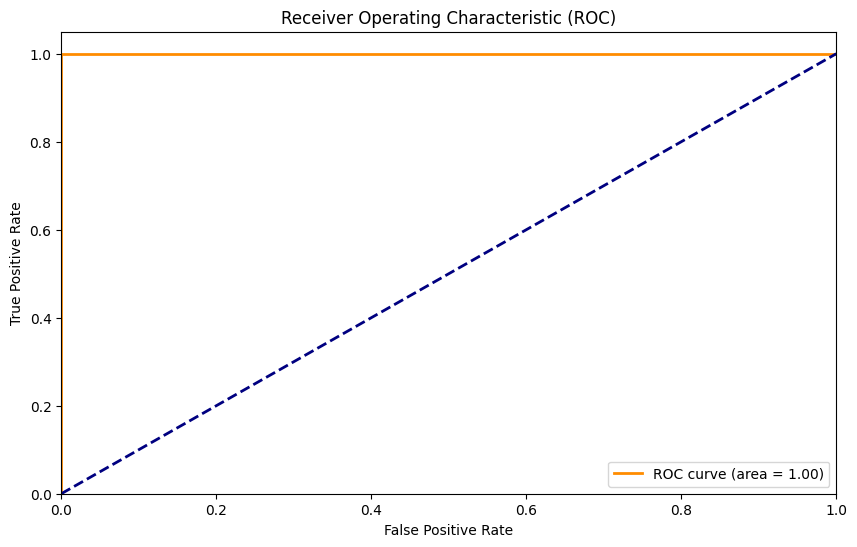

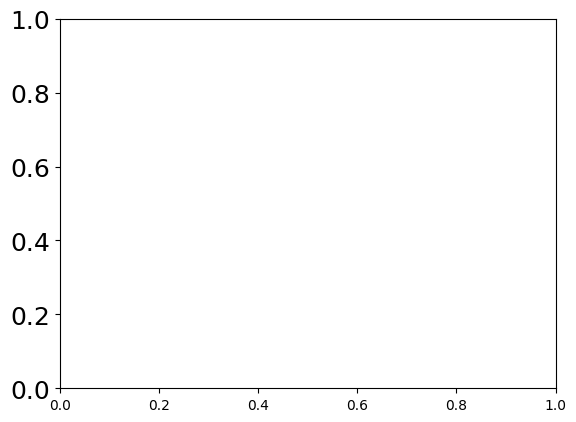

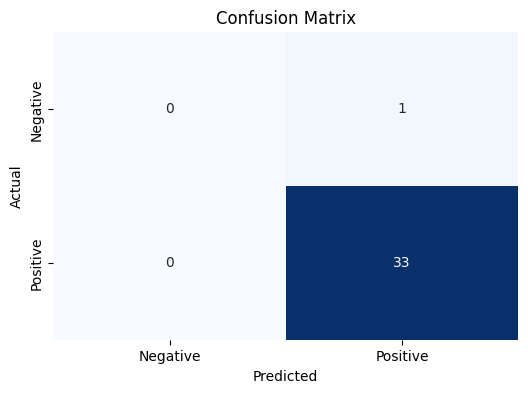

---------------vancomycin-----------------
0:	learn: 0.4825233	total: 1.26s	remaining: 6m 16s
100:	learn: 0.0058733	total: 49.8s	remaining: 1m 38s
200:	learn: 0.0023840	total: 1m 42s	remaining: 50.3s
299:	learn: 0.0015384	total: 2m 30s	remaining: 0us


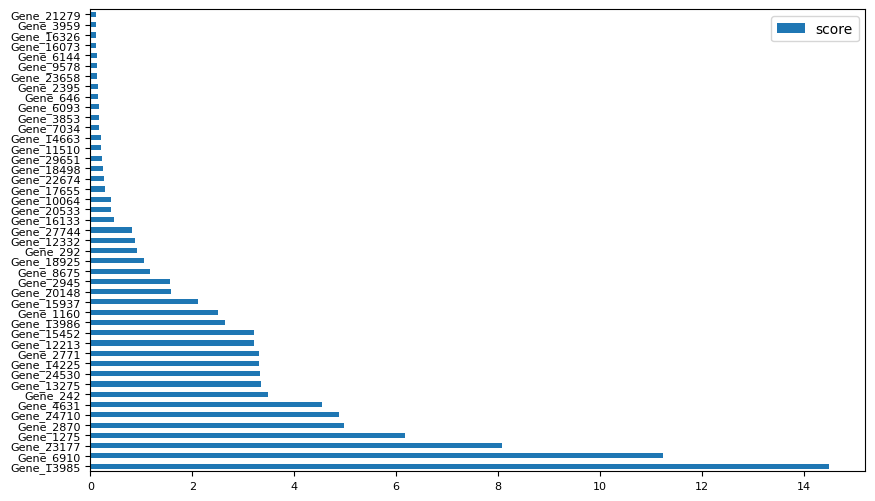

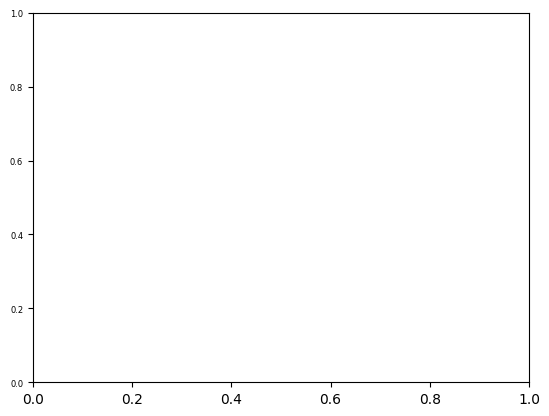

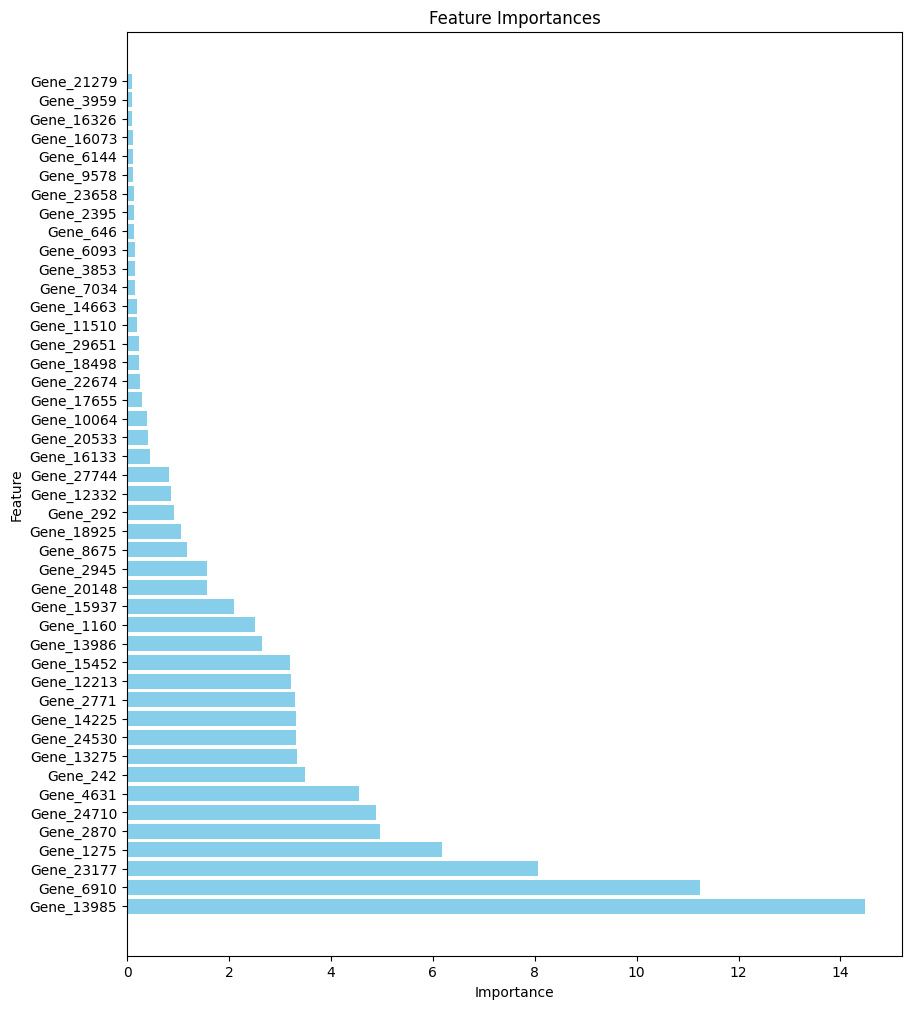

Streaming output truncated to the last 5000 lines.
25:	learn: 0.4534940	total: 15ms	remaining: 561ms
26:	learn: 0.4466190	total: 15.6ms	remaining: 560ms
27:	learn: 0.4398800	total: 16.1ms	remaining: 560ms
28:	learn: 0.4332625	total: 16.7ms	remaining: 560ms
29:	learn: 0.4274117	total: 17.3ms	remaining: 561ms
30:	learn: 0.4210280	total: 18ms	remaining: 562ms
31:	learn: 0.4140055	total: 18.6ms	remaining: 564ms
32:	learn: 0.4079014	total: 19.2ms	remaining: 563ms
33:	learn: 0.4017790	total: 19.8ms	remaining: 563ms
34:	learn: 0.3958975	total: 20.5ms	remaining: 564ms
35:	learn: 0.3901310	total: 21.1ms	remaining: 565ms
36:	learn: 0.3844728	total: 21.7ms	remaining: 564ms
37:	learn: 0.3794883	total: 22.2ms	remaining: 563ms
38:	learn: 0.3740310	total: 22.8ms	remaining: 562ms
39:	learn: 0.3686836	total: 23.4ms	remaining: 561ms
40:	learn: 0.3632917	total: 24ms	remaining: 561ms
41:	learn: 0.3581484	total: 24.6ms	remaining: 561ms
42:	learn: 0.3531238	total: 25.2ms	remaining: 560ms
43:	learn: 0.347518

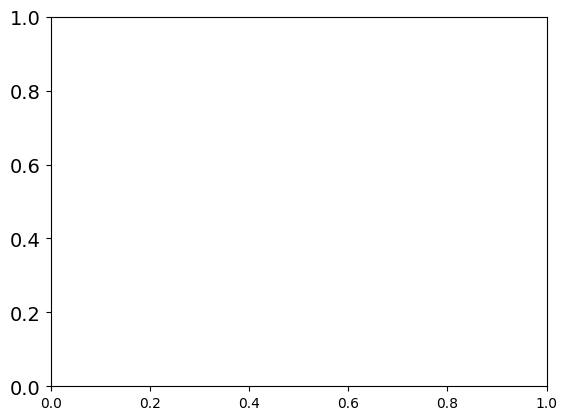

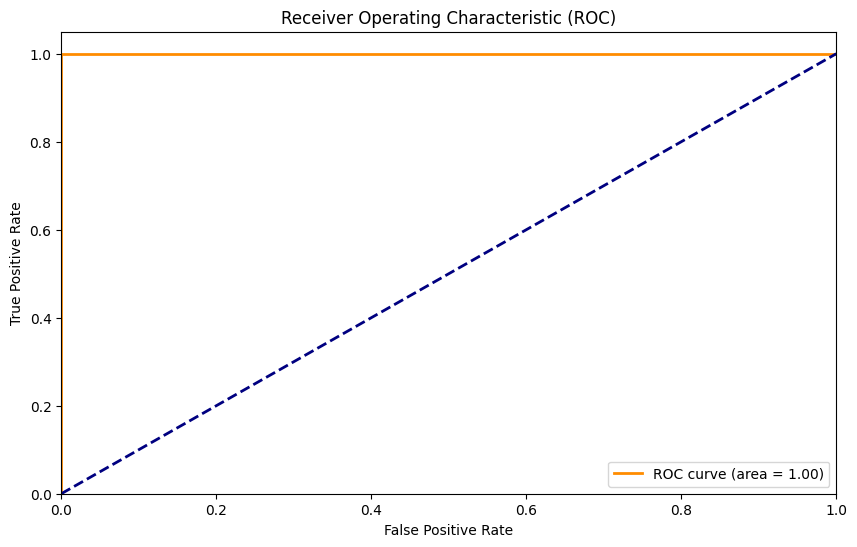

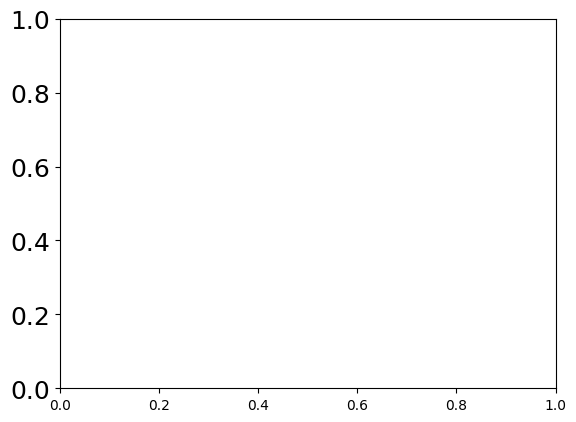

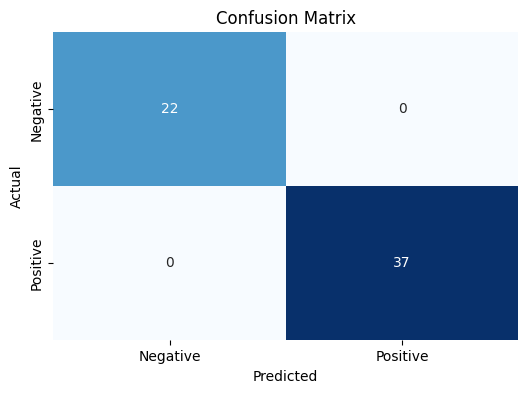

---------------streptomycin-----------------
0:	learn: 0.4860046	total: 129ms	remaining: 38.5s
100:	learn: 0.0044409	total: 28.3s	remaining: 55.8s
200:	learn: 0.0021943	total: 58.4s	remaining: 28.8s
299:	learn: 0.0014669	total: 1m 28s	remaining: 0us


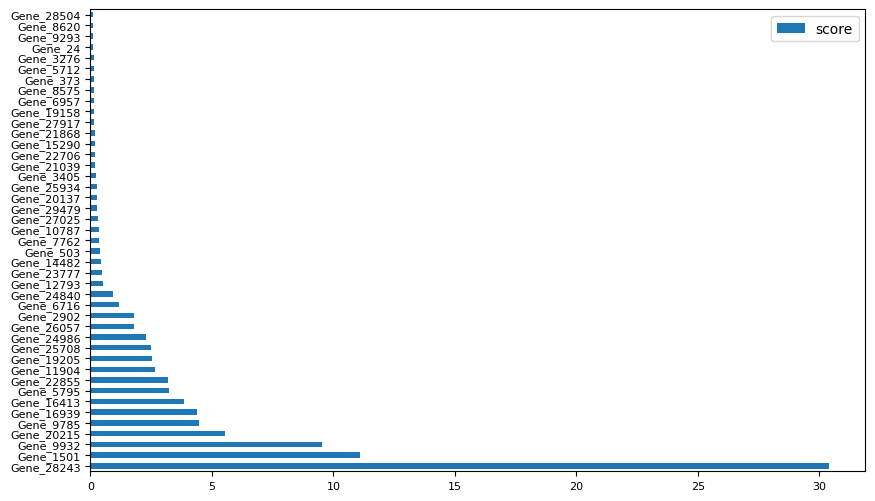

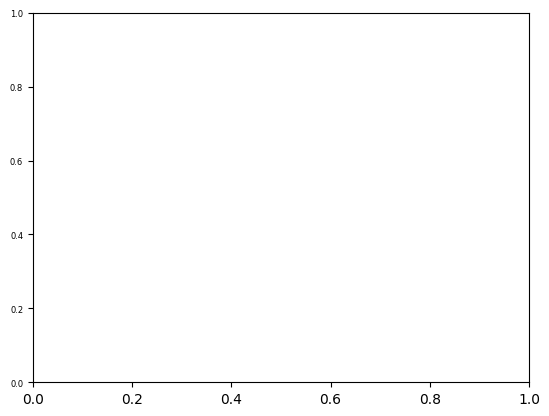

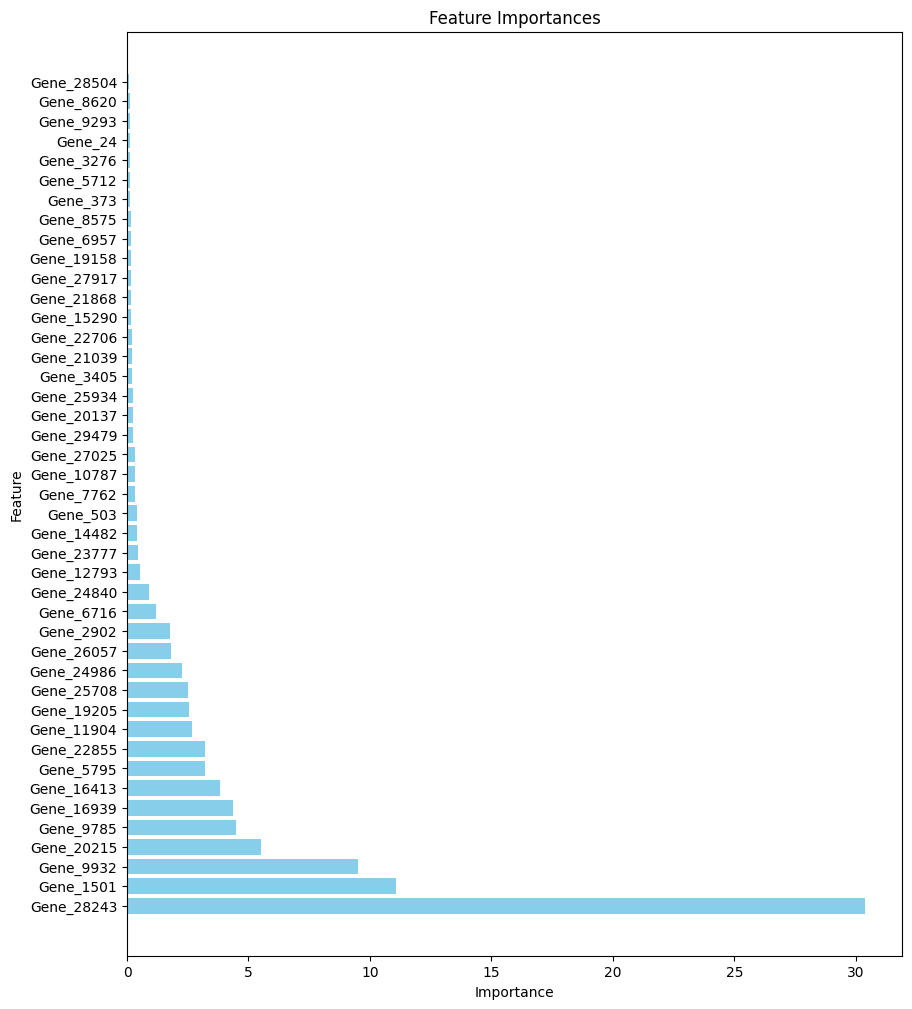

Streaming output truncated to the last 5000 lines.
25:	learn: 0.4827478	total: 10.7ms	remaining: 400ms
26:	learn: 0.4758909	total: 11.3ms	remaining: 406ms
27:	learn: 0.4706729	total: 11.8ms	remaining: 410ms
28:	learn: 0.4640035	total: 12.4ms	remaining: 414ms
29:	learn: 0.4583413	total: 13ms	remaining: 419ms
30:	learn: 0.4518981	total: 13.5ms	remaining: 423ms
31:	learn: 0.4453112	total: 14.1ms	remaining: 426ms
32:	learn: 0.4390366	total: 14.7ms	remaining: 431ms
33:	learn: 0.4329322	total: 15.2ms	remaining: 433ms
34:	learn: 0.4268905	total: 15.8ms	remaining: 435ms
35:	learn: 0.4210110	total: 16.3ms	remaining: 438ms
36:	learn: 0.4151854	total: 16.9ms	remaining: 440ms
37:	learn: 0.4101261	total: 17.4ms	remaining: 441ms
38:	learn: 0.4046952	total: 18ms	remaining: 444ms
39:	learn: 0.3997877	total: 18.5ms	remaining: 445ms
40:	learn: 0.3940033	total: 19.1ms	remaining: 446ms
41:	learn: 0.3891864	total: 19.6ms	remaining: 447ms
42:	learn: 0.3860621	total: 20.1ms	remaining: 448ms
43:	learn: 0.3807

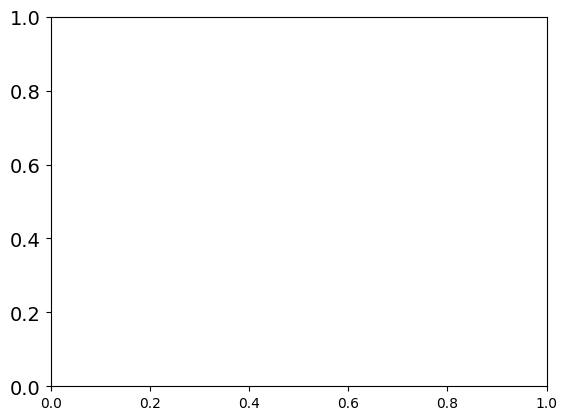

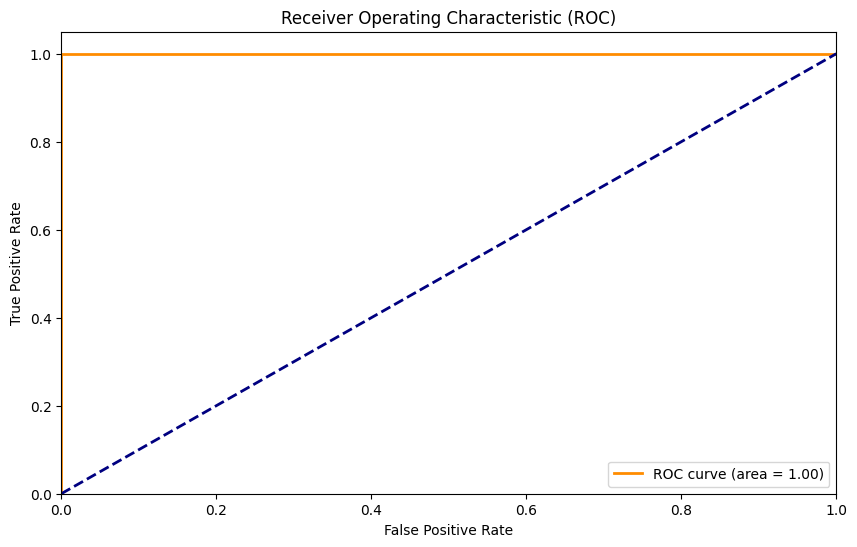

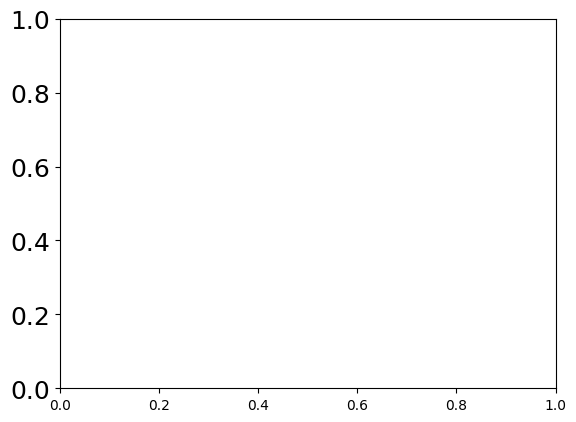

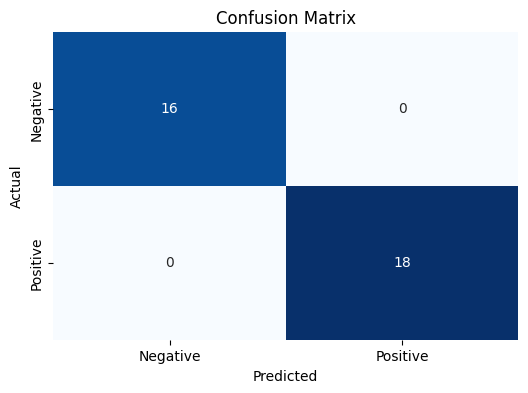

---------------teicoplanin-----------------
0:	learn: 0.4785898	total: 191ms	remaining: 57.2s
100:	learn: 0.0047906	total: 21.8s	remaining: 43s
200:	learn: 0.0023008	total: 41.9s	remaining: 20.7s
299:	learn: 0.0015645	total: 1m 3s	remaining: 0us


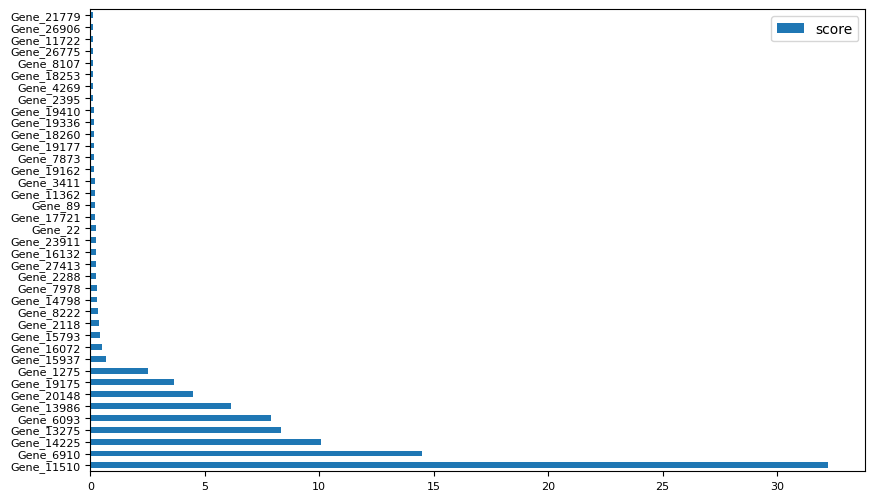

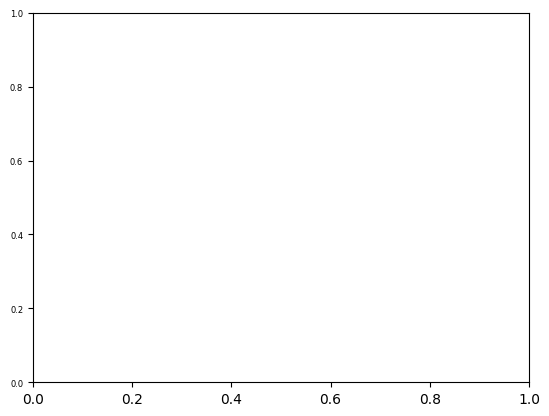

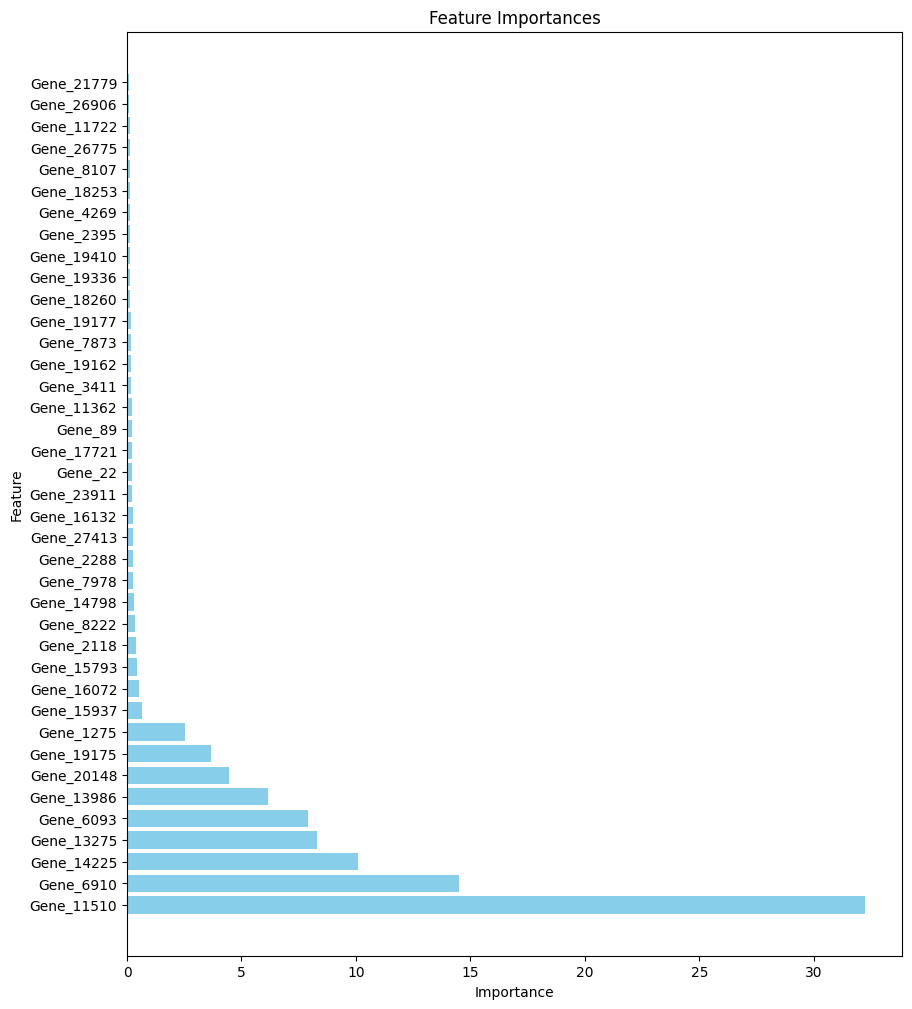

Streaming output truncated to the last 5000 lines.
25:	learn: 0.4509637	total: 14ms	remaining: 525ms
26:	learn: 0.4435814	total: 14.5ms	remaining: 524ms
27:	learn: 0.4363126	total: 15.1ms	remaining: 524ms
28:	learn: 0.4292148	total: 15.6ms	remaining: 524ms
29:	learn: 0.4222384	total: 16.9ms	remaining: 547ms
30:	learn: 0.4153255	total: 17.2ms	remaining: 539ms
31:	learn: 0.4085794	total: 17.6ms	remaining: 532ms
32:	learn: 0.4020541	total: 18ms	remaining: 526ms
33:	learn: 0.3956344	total: 18.3ms	remaining: 520ms
34:	learn: 0.3892066	total: 19ms	remaining: 523ms
35:	learn: 0.3829418	total: 19.8ms	remaining: 531ms
36:	learn: 0.3767274	total: 20.7ms	remaining: 540ms
37:	learn: 0.3706174	total: 21.3ms	remaining: 540ms
38:	learn: 0.3646140	total: 22.1ms	remaining: 545ms
39:	learn: 0.3587148	total: 22.8ms	remaining: 547ms
40:	learn: 0.3529724	total: 24ms	remaining: 561ms
41:	learn: 0.3472792	total: 24.5ms	remaining: 558ms
42:	learn: 0.3417884	total: 25.3ms	remaining: 562ms
43:	learn: 0.3363496	

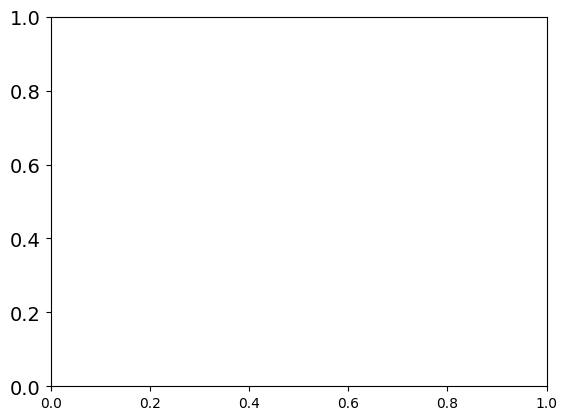

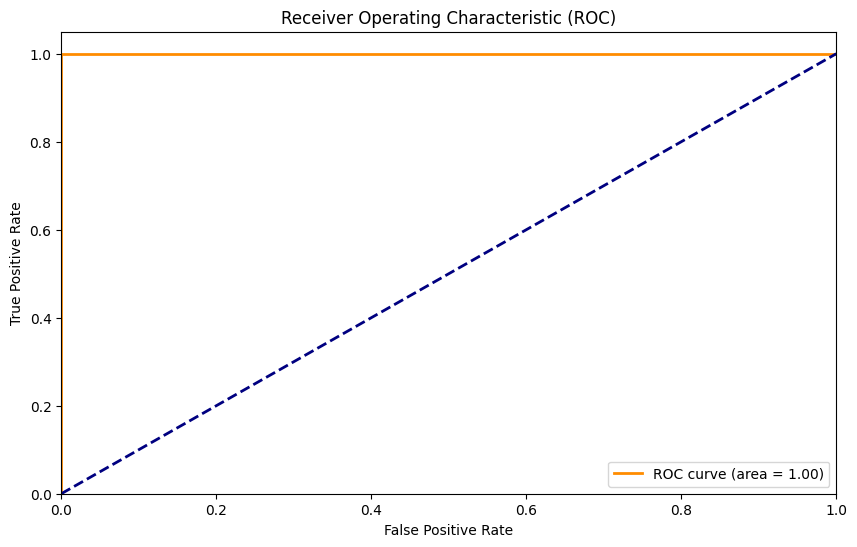

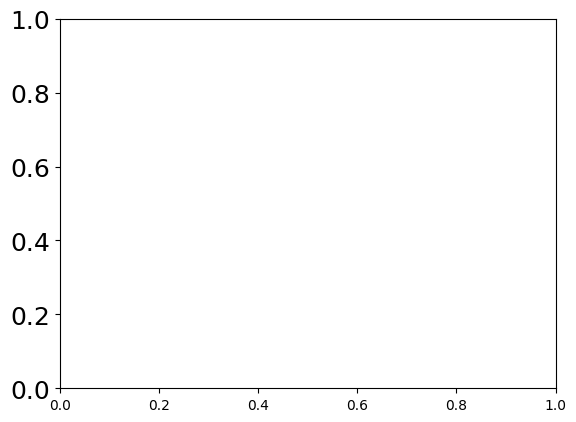

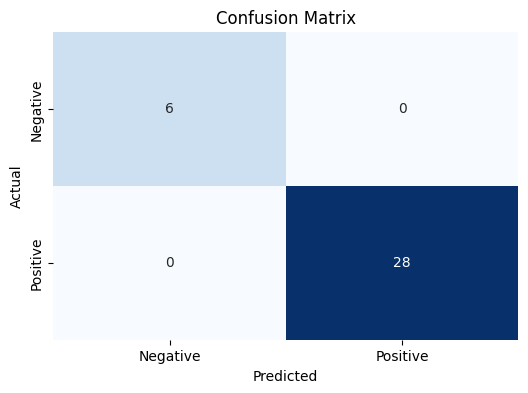

---------------gentamicin-----------------
0:	learn: 0.5223290	total: 132ms	remaining: 39.3s
100:	learn: 0.0064195	total: 29.5s	remaining: 58s
200:	learn: 0.0027482	total: 59.4s	remaining: 29.3s
299:	learn: 0.0017355	total: 1m 29s	remaining: 0us


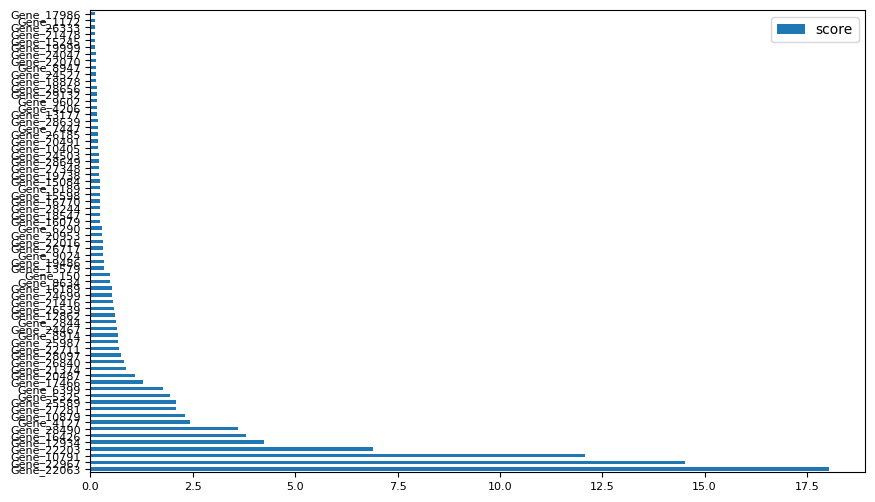

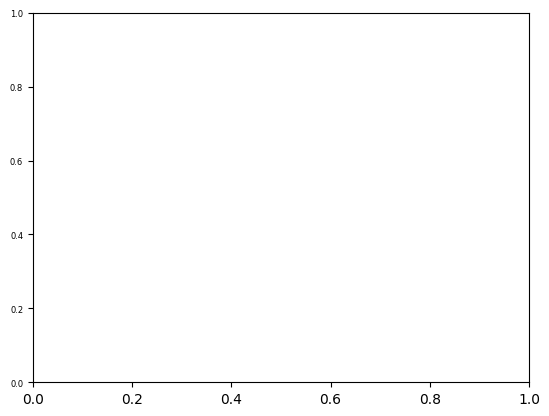

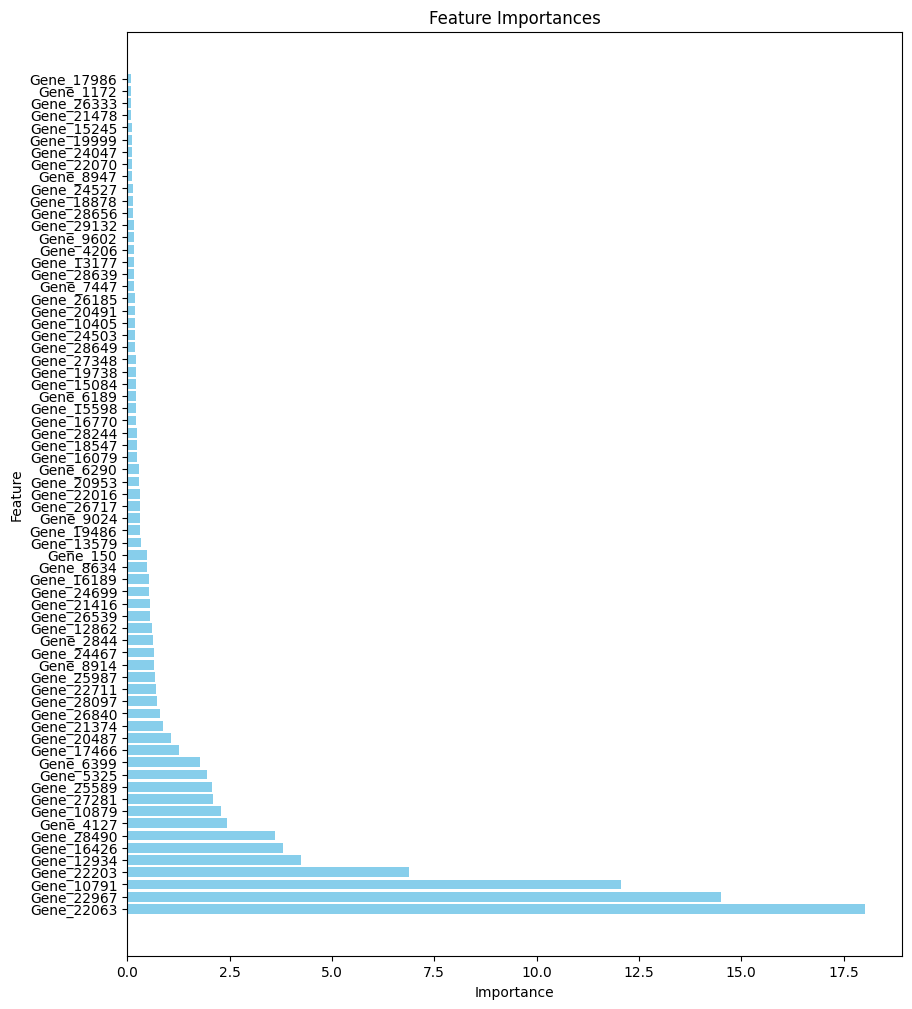

Streaming output truncated to the last 5000 lines.
25:	learn: 0.5271292	total: 17ms	remaining: 636ms
26:	learn: 0.5212061	total: 17.3ms	remaining: 625ms
27:	learn: 0.5158943	total: 17.7ms	remaining: 615ms
28:	learn: 0.5105408	total: 20.8ms	remaining: 698ms
29:	learn: 0.5054189	total: 21.2ms	remaining: 685ms
30:	learn: 0.5003650	total: 21.6ms	remaining: 674ms
31:	learn: 0.4949710	total: 22.1ms	remaining: 668ms
32:	learn: 0.4899036	total: 22.5ms	remaining: 659ms
33:	learn: 0.4849002	total: 22.9ms	remaining: 649ms
34:	learn: 0.4793477	total: 23.2ms	remaining: 640ms
35:	learn: 0.4748177	total: 23.7ms	remaining: 634ms
36:	learn: 0.4700775	total: 24.1ms	remaining: 627ms
37:	learn: 0.4654950	total: 24.5ms	remaining: 619ms
38:	learn: 0.4603554	total: 24.9ms	remaining: 613ms
39:	learn: 0.4551644	total: 25.2ms	remaining: 605ms
40:	learn: 0.4503489	total: 25.6ms	remaining: 600ms
41:	learn: 0.4460283	total: 26ms	remaining: 592ms
42:	learn: 0.4417647	total: 26.3ms	remaining: 585ms
43:	learn: 0.4389

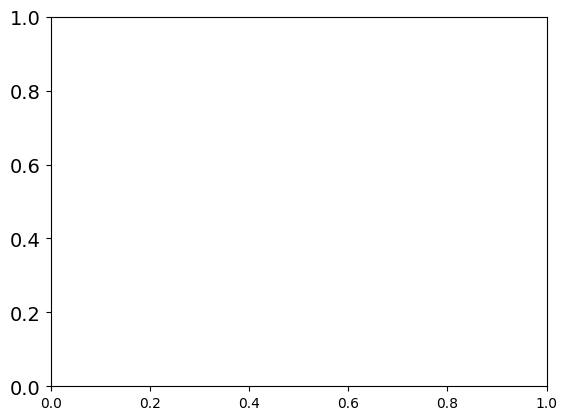

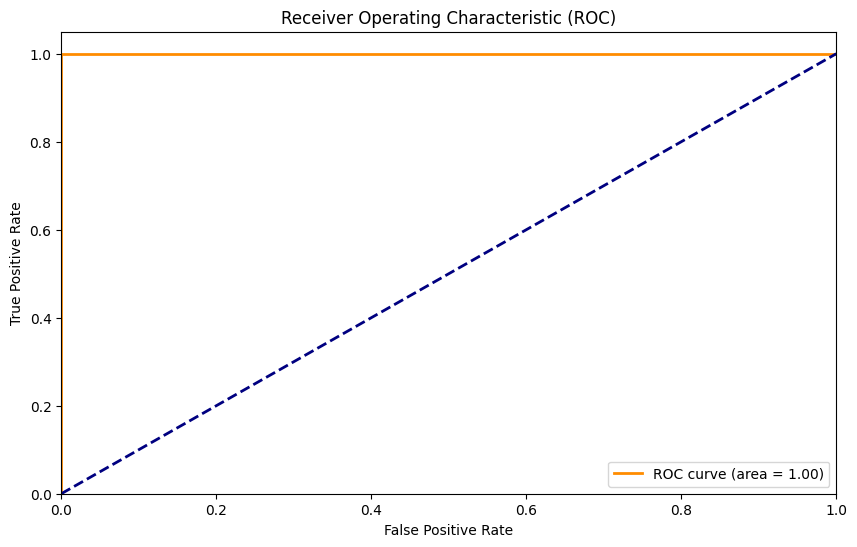

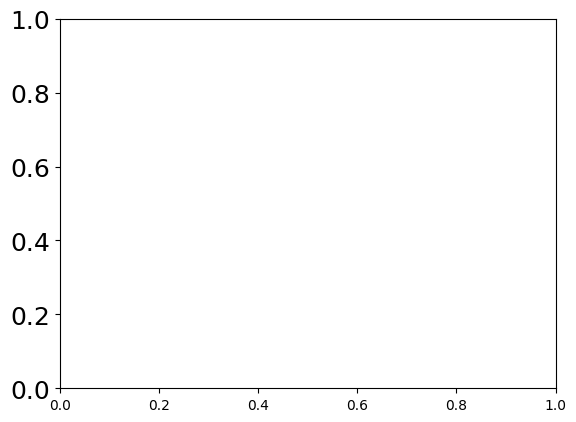

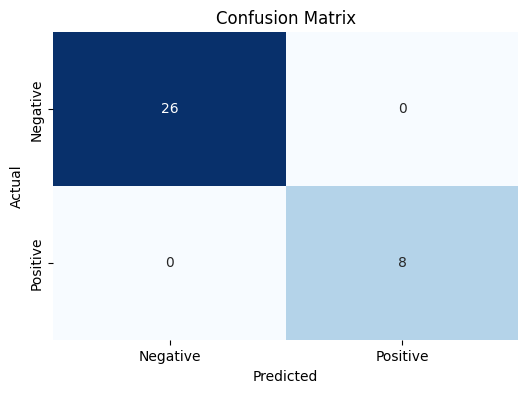

In [ ]:
  #discovered: linezolid has 0 resistant to any strains ＃170
  from sklearn.model_selection import train_test_split,  StratifiedKFold
  from sklearn.metrics import classification_report, accuracy_score
  from sklearn.feature_selection import SelectFromModel
  from sklearn.preprocessing import StandardScaler
  from sklearn.model_selection import GridSearchCV
  from sklearn.ensemble import AdaBoostClassifier
  from sklearn.datasets import make_classification
  from numpy import sort
  from statistics import mean
  from scipy.stats import chi2_contingency
  np.set_printoptions(threshold = np.inf)

  drugs = ['ampicillin','vancomycin','streptomycin','teicoplanin','gentamicin']

  for i in drugs:
    drug = i
    if i =='vancomycin':
      header_ = 1
    else:
      header_ = 0
    antibiotics = pd.read_csv('/content/drive/MyDrive/wulab_final/{}1.csv'.format(i),header =header_,index_col =0,encoding = 'utf-8') #header=1讓第二行作為欄位抬頭

    print("---------------{}-----------------".format(i))
    antibiotics.replace('R',1, inplace = True)
    antibiotics.replace('S',0, inplace = True)

    df_data = pd.DataFrame(data= antibiotics)
    header_list = df_data.columns.tolist()

    #check out data info & statistical description
    #df_data.info()
    #df_data.describe()


    #Define Input/ Output (array type)
    X = df_data.drop(labels=['Resistant'],axis=1).values
    y = df_data['Resistant'].values


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None, stratify =y)

    #Fit Model
    model =  CatBoostClassifier(iterations=300,
                            learning_rate=0.3,
                            depth=6,l2_leaf_reg=3.0,
                            loss_function='MultiClass',rsm=0.8,verbose=100,
                            early_stopping_rounds=50 )
    model.fit(X_train, y_train)
    print_feature(model)

    #prediction
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)


    # Fit model using each importance as a threshold
    thresholds = sort(model.feature_importances_ )[::-1]

    n=1
    fs = []
    for thresh in thresholds:
      print("n:", n)
      if n > 10 :
        break
      # select features using threshold
      selection = SelectFromModel(model, threshold=thresh, prefit=True)
      select_X_train = selection.transform(X_train)

      # train model
      selection_model = CatBoostClassifier()
      selection_model.fit(select_X_train, y_train)

      # eval model
      select_X_test = selection.transform(X_test)
      y_pred = selection_model.predict(select_X_test)
      predictions = [round(value) for value in y_pred]
      accuracy = accuracy_score(y_test, predictions)
      fs.append((thresh, select_X_train.shape[1], accuracy*100.0))
      print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))
      n+=1

    # 結果轉為DataFrame

    fs_df = pd.DataFrame(fs, columns=['Thresh', 'Feature Counts', 'Accuracy'])
    fs_df.to_csv('/content/drive/My Drive/wulab_final/cat_{}_fs.csv'.format(i))


    #評估報表
    print('--------------------REPORT: {}---------------------\n'.format(i))
    print(classification_report(y_test, y_pred))

    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.metrics import confusion_matrix, roc_curve, auc

    # Predict probabilities for the ROC curve
    y_prob = model.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class

    # Compute the ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    # Plot ROC Curve
    plt.yticks(fontsize=14)
    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc='lower right')
    plt.show()

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    plt.yticks(fontsize=18)
    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Negative', 'Positive'],
                yticklabels=['Negative', 'Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

# **Statistics**